In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Iris.csv")
X = df.drop(columns=["Id", "Species"])
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

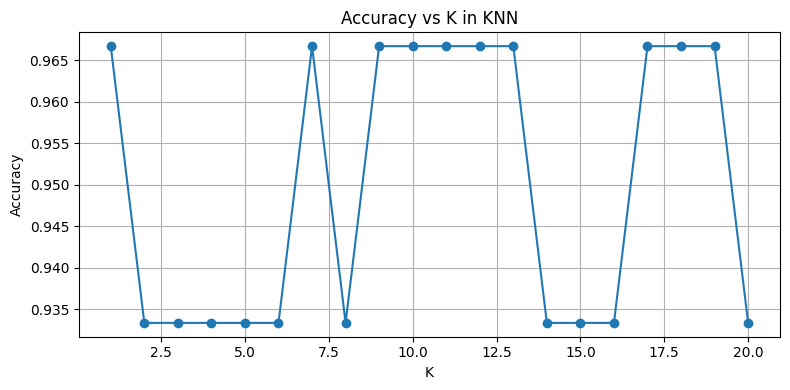

In [6]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)
    
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K in KNN")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

✅ Best K: 1
🎯 Final Accuracy: 0.9667


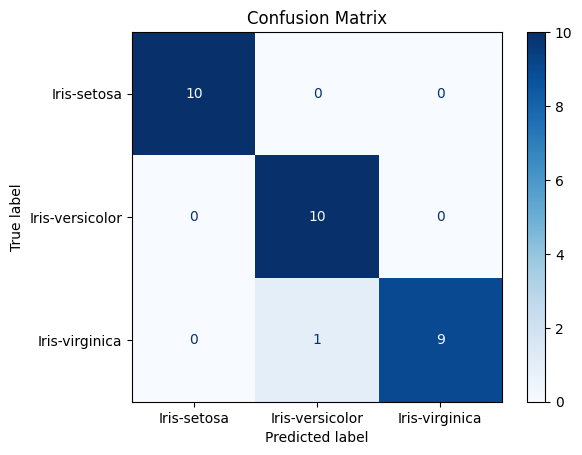

In [7]:
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

acc_final = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=knn_best.classes_)

print(f"✅ Best K: {best_k}")
print(f"🎯 Final Accuracy: {acc_final:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

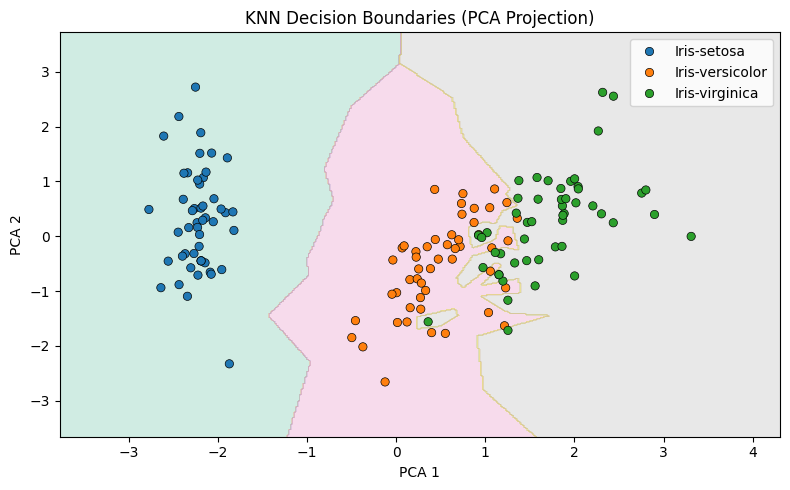

In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_pca, y_train_pca)


h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set2")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y_encoded), edgecolor="k")
plt.title("KNN Decision Boundaries (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()